# Task 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cross Entropy

Cross-entropy loss, also known as negative log likelihood loss, is a commonly used loss function in machine learning for classification problems. The function measures the difference between the predicted probability distribution and the true distribution of the target variables. It is commonly used in supervised learning problems with multiple classes, such as in a neural network with softmax activation. The cross-entropy loss is used as the optimization objective during training to adjust the model’s parameters. The cross-entropy loss function is an optimization function that is used for training classification models which classify the data by predicting the probability

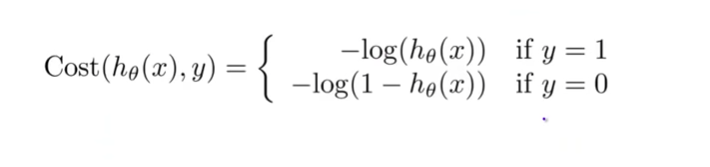

In [2]:
from IPython.display import Image
Image(filename=(r"C:\Users\user\Downloads\Screenshot-2020-10-15-at-3.13.11-PM.png"))

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
 
def cross_entropy_loss(y_pred, y):
    if y == 1:
      return -np.log(y_pred)
    else:
      return -np.log(1 - y_pred)

# Entropy
The entropy measures the “amount of information” present in a variable. Now, this amount is estimated not only based on the number of different values that are present in the variable but also by the amount of surprise that this value of the variable holds.A high entropy means low information gain, and a low entropy means high information gain. Information gain can be thought of as the purity in a system: the amount of clean knowledge available in a system

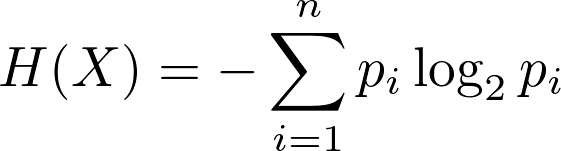

In [4]:
from IPython.display import Image
Image(filename=(r"C:\Users\user\Downloads\Entropy.png"))

Pi = Probability of randomly selecting an example in class I

Entropy always lies between 0 and 1, however depending on the number of classes in the dataset, it can be greater than 1

In [5]:
def entropy(Y):
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log2(prob))
    return en

# Conditional Entropy

 joint entropy is the amount of information in two (or more) random variables; conditional entropy is the amount of information in one random variable given we already know the other.


conditional entropy = Joint Entropy - Entropy of X

 H(Y|X) = H(Y;X) - H(X)

In [6]:
#Joint Entropy
def jEntropy(Y,X):
    YX = np.c_[Y,X]
    return entropy(YX)

#Conditional Entropy
def cEntropy(Y, X):
    return jEntropy(Y, X) - entropy(X)

# KL Divergence
The Kullback-Leibler Divergence score, or KL divergence score, quantifies how much one probability distribution differs from another probability distribution. The KL divergence between two distributions Q and P is often stated using the following notation: KL(P || Q)

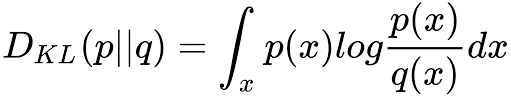

In [7]:
from IPython.display import Image
Image(filename=(r"C:\Users\user\Downloads\KLD.png"))

In [8]:
import numpy as np

def KLD(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

# Mutual Information

Mutual information is a quantity that measures a relationship between two
random variables that are sampled simultaneously. In particular, it measures
how much information is communicated, on average, in one random variable
about another

I(X;Y) = H(X) + H(Y) - H(X;Y)

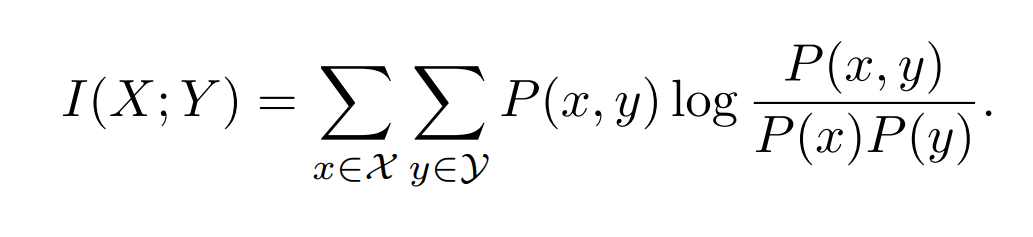

In [9]:
from IPython.display import Image
Image(filename=(r"C:\Users\user\Downloads\mutual info.png"))

In [10]:
def shannon_entropy(A, mode="auto", verbose=False):
    A = np.asarray(A)
    if mode == "auto":
        condition = np.all(A.astype(float) == A.astype(int))
        if condition:
            mode = "discrete"
        else:
            mode = "continuous"
    if verbose:
        print(mode, file=sys.stderr)
    # Compute shannon entropy
    pA = A / A.sum()
    # Remove zeros
    pA = pA[np.nonzero(pA)[0]]
    if mode == "continuous":
        return -np.sum(pA*np.log2(A))  
    if mode == "discrete":
        return -np.sum(pA*np.log2(pA))   

def mutual_information(x,y, mode="auto", normalized=False):
    # I(X, Y) = H(X) + H(Y) - H(X,Y)
    x = np.asarray(x)
    y = np.asarray(y)
    # Determine distribution type
    if mode == "auto":
        condition_1 = np.all(x.astype(float) == x.astype(int))
        condition_2 = np.all(y.astype(float) == y.astype(int))
        if all([condition_1, condition_2]):
            mode = "discrete"
        else:
            mode = "continuous"

    H_x = shannon_entropy(x, mode=mode)
    H_y = shannon_entropy(y, mode=mode)
    H_xy = shannon_entropy(np.concatenate([x,y]), mode=mode)

    # Mutual Information
    I_xy = H_x + H_y - H_xy
    if normalized:
        return I_xy/np.sqrt(H_x*H_y)
    else:
        return  I_xy

Working with toy dataset

In [11]:
df = pd.read_csv(r"C:\Users\user\Downloads\TOY_DATA\toy_dataset.csv")

In [12]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


# Task 1

The probability density function (pdf) of the Fréchet distribution is

Frechet pdf

for x ≥ γ. Here, γ is the location parameter, α > 0 is the shape parameter and β > 0 is the scale parameter.

The cumulative distribution function (cdf) is  

Frechet cdf

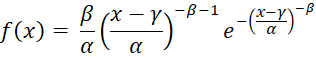

In [13]:
from IPython.display import Image
Image(filename=(r"C:\Users\user\Downloads\pdf_frechet_distri.png"))

frechet pdf

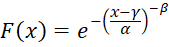

In [14]:
from IPython.display import Image
Image(filename=(r"C:\Users\user\Downloads\cdf_frenchet.png"))

frechet cdf

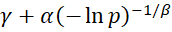

In [15]:
from IPython.display import Image
Image(filename=(r"C:\Users\user\Downloads\Inverse.png"))

frechet inverse cdf (ppf)

In [16]:
from scipy.stats import invweibull